In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy.integrate import simps
from scipy.signal import convolve

In [2]:
cie_1964 = pd.read_csv("Data/CIE_xyz_1964_10deg.csv")

wavelengths = cie_1964.iloc[:,0]
human_r = cie_1964.iloc[:,1]
human_g = cie_1964.iloc[:,2]
human_b = cie_1964.iloc[:,3]

human_b = [0 if math.isnan(x) else x for x in human_b]   # convert NaN to 0

human_observer = np.vstack((human_r, human_g, human_b)).T # combine to array

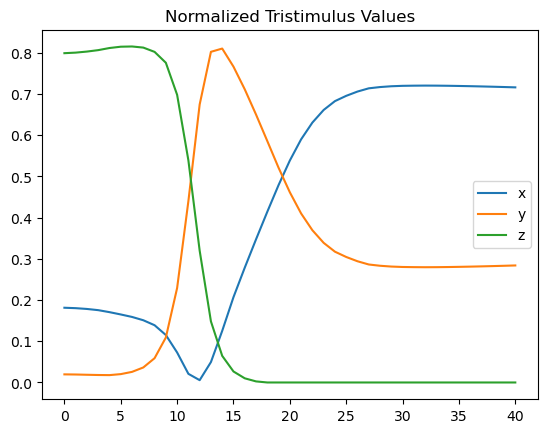

In [3]:
# Handle NaN values in human_b
human_b = [0 if math.isnan(x) else x for x in human_b]

# Define the list of desired wavelengths for which you want to calculate tristimulus values
desired_wavelengths = np.arange(380 , 780 + 1, 10)  # Adjust to your desired wavelengths

# Initialize lists to store tristimulus values for each desired wavelength
X_values = []
Y_values = []
Z_values = []
x_values = []
y_values = []
z_values = []

# Define the parameters for the light spectrum P (Gaussian)
amplitude = 1.0  # Adjust as needed
standard_deviation = 1.0  # Adjust as needed

# Generate a list of wavelengths (from 400nm to 800nm, for example)
wavelengths_spectrum = np.linspace(400, 800, 470)

# Loop over the desired wavelengths and calculate tristimulus values
for target_wavelength in desired_wavelengths:
    # Find the index of the target wavelength in the CMF data
    idx = np.argmin(np.abs(wavelengths - target_wavelength))

    # Calculate the Gaussian spectrum for the specific wavelength
    light_spectrum = amplitude * np.exp(-((wavelengths_spectrum - target_wavelength) ** 2) / (2 * standard_deviation ** 2))

    # Calculate the tristimulus values for the specific wavelength
    X_integrand = human_r[idx] * light_spectrum
    Y_integrand = human_g[idx] * light_spectrum
    Z_integrand = human_b[idx] * light_spectrum

    X = simps(X_integrand, wavelengths_spectrum)
    Y = simps(Y_integrand, wavelengths_spectrum)
    Z = simps(Z_integrand, wavelengths_spectrum)
    
    total_tristimulus = X + Y + Z
    
    x = X / total_tristimulus
    y = Y / total_tristimulus
    z = Z / total_tristimulus
    
    # Append the tristimulus values to the respective lists
    X_values.append(X)
    Y_values.append(Y)
    Z_values.append(Z)

    x_values.append(x)
    y_values.append(y)
    z_values.append(z)
# # The X_values, Y_values, and Z_values lists contain the tristimulus values for the desired wavelengths.
# print("X values:", X_values)
# print("Y values:", Y_values)
# print("Z values:", Z_values)

plt.plot(x_values, label = 'x')
plt.plot(y_values, label = 'y')
plt.plot(z_values, label = 'z')
plt.title('Normalized Tristimulus Values')
plt.legend()

Text(0.5, 1.0, 'CIE xy Border')

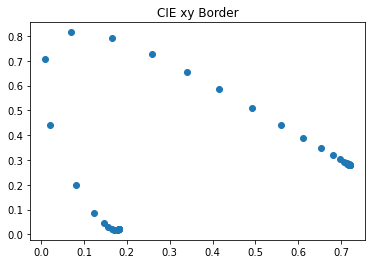

In [22]:
plt.scatter(x_values, y_values)
plt.title('CIE xy Border')

In [4]:
len(cie_1964.iloc[:,0])

470

Text(0.5, 1.0, 'CIE Standard Human Observer ')

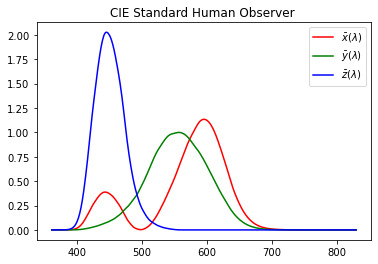

In [5]:
plt.plot(wavelengths, human_r, color='r', label = r'$\bar{x}(\lambda)$')
plt.plot(wavelengths, human_g, color='g', label = r'$\bar{y}(\lambda)$')
plt.plot(wavelengths, human_b, color='b', label = r'$\bar{z}(\lambda)$')
plt.legend()
plt.title('CIE Standard Human Observer ')

In [6]:
hunt_pointer_estevez = np.matrix(([0.49000, 0.31000, 0.20000],
                                 [0.17697, 0.81240, 0.01063],
                                 [0.00000, 0.01000, 0.99000]))

In [7]:
# Define the parameters for the light spectrum P (gaussian)
amplitude = 1.0  # Adjust as needed
peak_wavelength = 550.0  # Desired peak wavelength (in nanometers)
standard_deviation = 1.0  # Adjust as needed

# Generate a list of wavelengths (from 400nm to 800nm, for example)
wavelengths = np.linspace(400, 800, 470)

# Generate the Gaussian curve
light_spectrum = amplitude * np.exp(-((wavelengths - peak_wavelength) ** 2) / (2 * standard_deviation ** 2))

Text(0.5, 1.0, 'Light Spectrum $P(\\lambda)$')

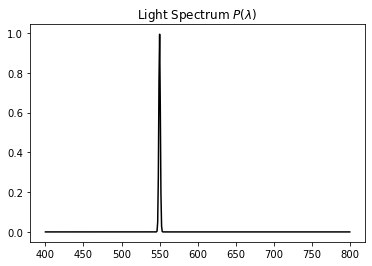

In [8]:
plt.plot(wavelengths, light_spectrum, color = 'black')
plt.title(r'Light Spectrum' + ' $P(\lambda)$')

In [9]:
X_integrand = human_r * light_spectrum
Y_integrand = human_g * light_spectrum
Z_integrand = human_b * light_spectrum

X = simps(X_integrand, wavelengths)
Y = simps(Y_integrand, wavelengths)
Z = simps(Z_integrand, wavelengths)

In [10]:
X, Y, Z

(0.8291440470397464, 2.353133737759882, 0.04495340802542348)

In [11]:
# plt.plot(X_integrand)
# plt.plot(Y_integrand)
# plt.plot(Z_integrand)

In [12]:
# cmf = np.dot(human_observer, np.linalg.inv(hunt_pointer_estevez))

In [13]:
# cmf_r = cmf[:, 0]
# cmf_g = cmf[:, 1]
# cmf_b = cmf[:, 2]

In [14]:
# plt.plot(cmf_r, color='r')
# plt.plot(cmf_g, color='g')
# plt.plot(cmf_b, color='b')